QUESTION: AGME insurance Inc. offers affortable health insurance to thousands of customewrs all over unit4ed states. as the lead data scientist at ACME,your're tasked with creating an automated system to estimate the annual medical expenditure for new  customers, using information such as their age,sex,BMI,children,smoking habits and region residence


Estimates from your system will be used to determine the annual insurance premium(amount paid every month) offered to the customers.Due to regulatory requirments,you must be able to explain why system outputs a certain prediction.

you have given a csv file contained verified historical data over 1300 customers.

In [2]:
import pandas as pd

medical_pd = pd.read_csv('insurance.csv')

medical_pd.tail()



,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


the datasets contain 1338 row and 7 columns

In [3]:
medical_pd.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


the ranges of values in numerical columns seems resonable too(no negative ages!) so we may not have to do much data cleaning or correction

Exploratory Analysis and Visulization

lets explore the data by visualizing the distributions of values in some columns of datasets,and their realationship between "chargers" and other columns

we'll use libraries Matplotlib,Seaborn and plotly for visulualization.

In [8]:
# Importing Seaborn for statistical data visualization
import seaborn as sns
# Importing Plotly Express for creating interactive visualizations
import plotly.express as px

# Importing Matplotlib for creating static, animated, and interactive visualizations
import matplotlib
import matplotlib.pyplot as plt

# Enabling inline plotting for Matplotlib in Jupyter Notebook
%matplotlib inline

In [10]:

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] =(10,6)
matplotlib.rcParams['figure.facecolor'] ='#00000000'

Age:  age is a numerical column. the minimum is 18 and max is 64. thus we can visualizethe distribution of ages using 47 bins(one of each year) and a box plot we'll use plotly  to make the chart interactive,but you can create similar chart using seaborn.

In [16]:
fig = px.histogram(medical_pd,
                   x= 'age', 
                    marginal='box',
                     nbins =47,
                    title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

the distibution of ages in the datasets is almost uniform with 20-30 costumers at very  age. except fro the ages 18 and 19,which seem to have over twice as many customers as other ages. the uniform distribution might arise from the fact that there isn't a big variation in the numberr of of peaple peaple of any given age(between 18 & 64) in usa

Body Mass Index:
lets look at the distribution of BMI of customers using histogram and box plot

In [21]:
fig = px.histogram(medical_pd,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['purple'],
                   title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

The measurements of body mass index seemto form a Gaussian distribution centered around the valur 30,with few outliers
towards the right.

Charges:
        Lets visualize charge distribution. i.e. the annual medical charges for customers. this is the column we are trying to predict.we'll distiguish chargers for smoker and non-smoker.

In [38]:
fig = px.histogram(medical_pd,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['grey','green'],
                   title='Annual Medical charges')
fig.update_layout(bargap=0.1)
fig.show()

Obersarvations:

   . For most of the customers,the annual medical charges are under $10,000. Only a fraction of customers have higher.possibly due to accidents,mojor emergencies,genetic diseases. The distribution follows "power law".

. There is a significant diffrence in the charges between smoker and non smoker. while the the median of non smoker is 7300. and for smokers it is around 35k. which is basically very high.

lets visualize smoker using("yes" or "no") using histogram

In [39]:
medical_pd.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [40]:
px.histogram(medical_pd,x='smoker',color='sex',title='smoker')

it appears that about 20% customers reported that they smoke.we can all see that smokers appears a more common habit in males.

we have visualized the indivitual columns. now lets visualize the relationship between two columns.

AGE AND CHARGES:
            relationship between age and charges using scatter plot. each point in the scatter plot
            represent a customer. we'll also use "smoker" coulumns to color the points

Observations:
  .The general trend seems to be that medical charges increses with age,as we might expect.
  however there is signifcant variation at every age. and it is clear that age alone cannot determine the expanse.

  .we can see three 'cluster' of points,each of which seems to form a line with increasing slop:

  1.The first and largest cluster consist of primary of presumbly "healthy and non-smokers"
  who have might have very low medical expanses. compared to others.

  2.The second consist of mix of smokers and non-smokers. these are two distinct but overlapping clusters:"non smokers with major medical issues and smokers without major medical issues.

3.The third conisit of smokers with major medical issues. which we can see in the graph that their charges are high

BMI AND CHARGES

In [49]:
fig =px.scatter(medical_pd,
                x='bmi',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='bmi vs charges')
fig.update_traces(marker_size =5)
fig.show()

It appears that for non-smokers an increase in bmi doesnt seem to related to an increase in medical charges.
however,medical charges seem to be significantly higher for smokers with a BMI of more than 30.

Correlation

As you can tell from the analysis the values in some coloumns are more closely related to values in charges.
example age and charges seem to grow together. but bmi vs charge dont.

this relationship is numerically expressed using a measure called correlation coefficeint,which can be computed using
.corr method in pandas series.

In [50]:
medical_pd.charges.corr(medical_pd.age)

np.float64(0.2990081933306478)

In [51]:
medical_pd.charges.corr(medical_pd.bmi)

np.float64(0.19834096883362887)

To compute with categorical columns,they must have first converted to numerical columns. example is shown below

In [57]:
smoker_value ={"no":0,'yes':1}
smoker_numeric =medical_pd.smoker.map(smoker_value)
medical_pd.charges.corr(smoker_numeric)

np.float64(0.7872514304984778)

Strength: the greater the absolute valueof the correlation,the stronger the relatioship

Direction: the sign of correlation coffecient represent the direction of the relationship.

. positive means when one variable value increases,then the other variable also tends to increase.positive relatioship produces an upward slop on scatterplot. negative vis versa

The result of .corr is called correlation matrix and it is often represented by heatmaps

Text(0.5, 1.0, 'Correlation Matrix')

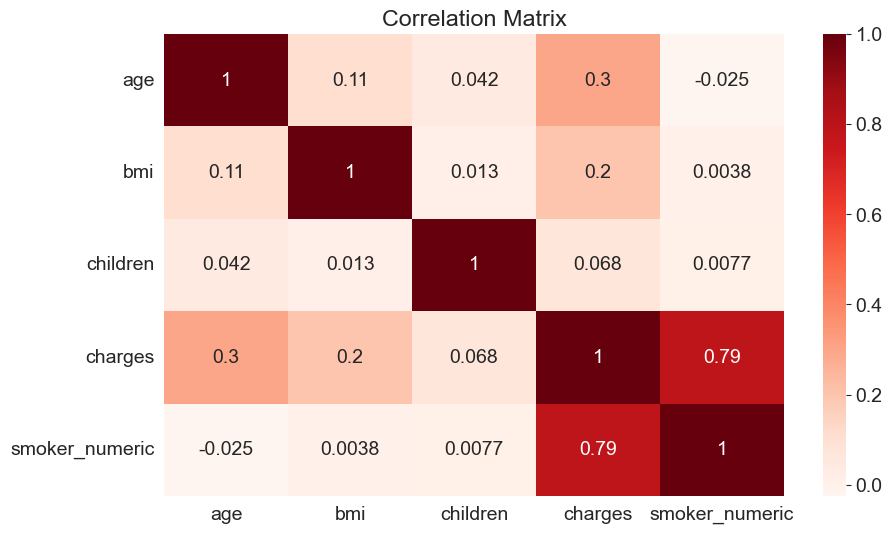

In [60]:
sns.heatmap(medical_pd.select_dtypes(include=['number']).corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

Linear Regression Using a Single Feature

we know that smoker and age coulumns  have the strongest correlation, with charges. lets try to estimate the value of charges using ages for non-smokers. for that fisrt lets create a dataframe containing only the data of non-smokers. 

<Axes: title={'center': 'age vs charges'}, xlabel='age', ylabel='charges'>

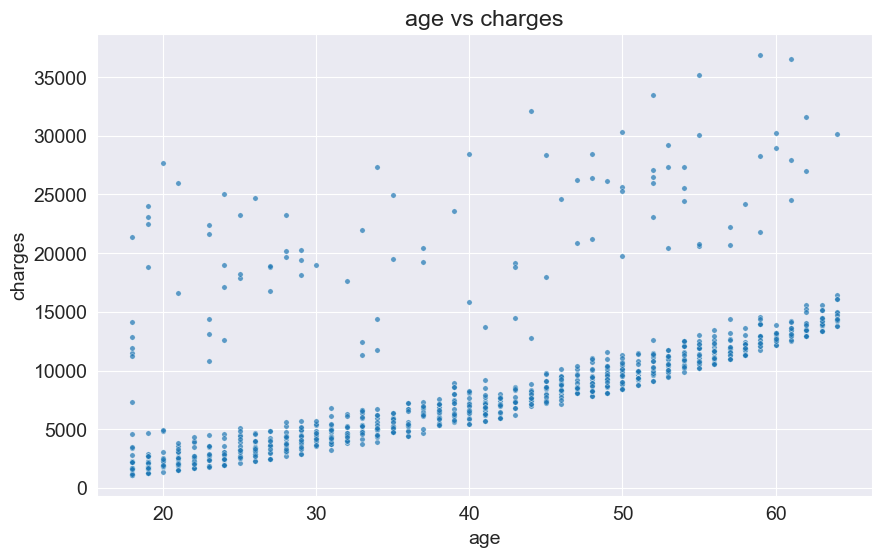

In [72]:
non_smokers = medical_pd[medical_pd.smoker =='no']

plt.title('age vs charges')
sns.scatterplot(data=non_smokers,x='age',y='charges',alpha=0.7,s=15)

these points seems to form a line. we will try to fit a line using these points and use the line to predict the charges for a given age. a line in x-y plane with slope m

y = wx + b

Model

we will asume the follwoing realtionship:

CHARGES = w * age + b    
 ('w' and 'b' are called weight and bayes in satistics and ML.)

.This techinique is called linear regression ,the equation above we called a linear regression model,becuase it models
the relationship between age and charges as a straight line.

.The numbers w and b are called parameters or weights of the model.

.The values in the age columns is called the inputs to the model and values in charges is called targets.

lets define a helper funtion to compute charges,given age,m,c

In [67]:
def estimate_charges(age,w,b):
    return w*age +b

In [ ]:
w = 57
b=100

In [70]:
estimate_charges(65,w,b)

2375

In [73]:
ages =non_smokers.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [77]:
estimated_charges =estimate_charges(ages,w,b)
estimated_charges

1        730
2       1080
3       1255
4       1220
5       1185
        ... 
1332    1920
1333    1850
1334     730
1335     730
1336     835
Name: age, Length: 1064, dtype: int64

In [78]:
non_smokers.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

we can plot using a straight line graph

Text(0, 0.5, 'Estimated charges')

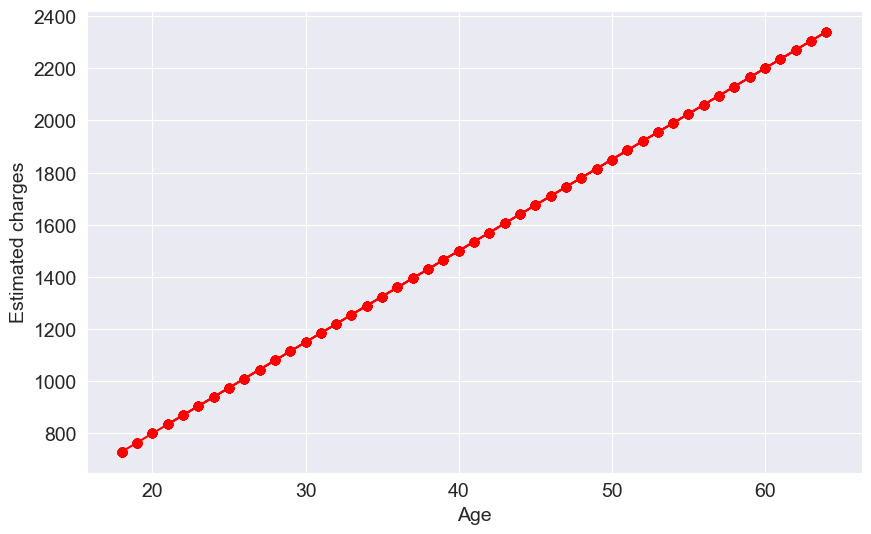

In [80]:
plt.plot(ages,estimated_charges,'r-o')
plt.xlabel('Age')
plt.ylabel('Estimated charges')

As we expected,the graph is a straght line. we can overlay this line on our actual data,so see how well our model fits the data


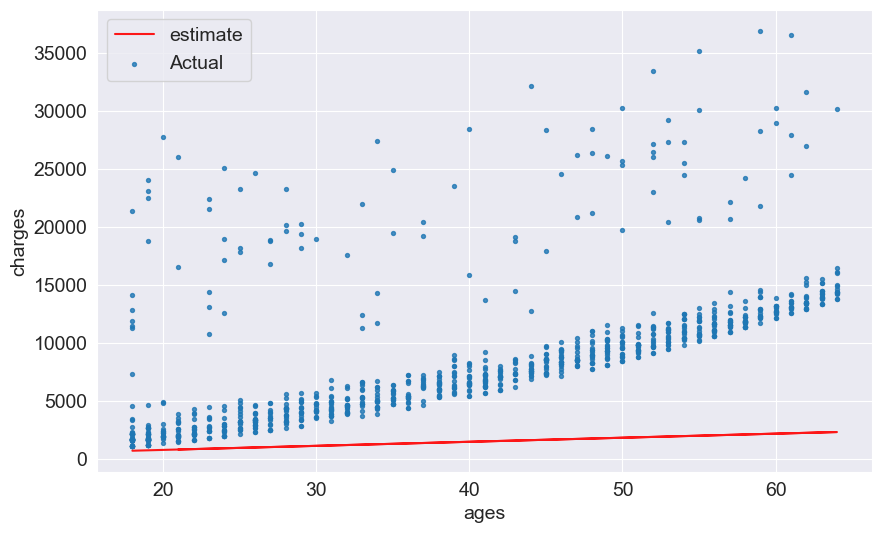

In [81]:
target = non_smokers.charges
plt.plot(ages,estimated_charges,'r',alpha =0.9)

plt.scatter(ages,target,s=8,alpha=0.8)
plt.xlabel('ages')
plt.ylabel('charges')
plt.legend(['estimate','Actual'])

clearly,the our estimates are quite poor and the line does'nt fit the data, however we can try diffrent values of w and b to move the line around, lets define a helper funtion which takes w and b as inputs and creates the above plot.

In [88]:
def try_parameters(w, b):
    ages = non_smokers.age
    target = non_smokers.charges

    estimated_charges = estimate_charges(ages, w, b)
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)

    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('ages')
    plt.ylabel('charges')
    plt.legend(['estimate', 'Actual'])

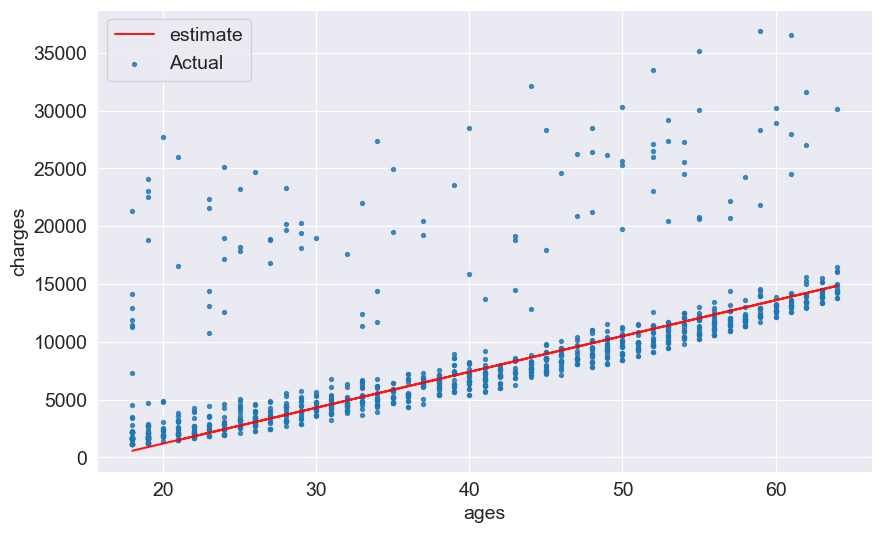

In [114]:
try_parameters(310,-5000)

In [ ]:
# targets = non_smokers.charges
# targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [ ]:
# predictions = estimated_charges
# predictions

1        730
2       1080
3       1255
4       1220
5       1185
        ... 
1332    1920
1333    1850
1334     730
1335     730
1336     835
Name: age, Length: 1064, dtype: int64

Loss/Cost funtions

we compare our model predictions with actual targets using the following method:

1.Calculate the diffrence between the targets and predictions(the diffrence is called rasidual)
2.square all the elements of the diffenrce metrix to remove the negative values.
3.calculate the avarage using the resulting matrix
4.take the square root

the result is single number known as root mean squared error(RMSE).


Lets Define funtion to compute RMSE


In [118]:
import numpy as np


In [121]:
def rmse(targets,predicted):
    return(np.sqrt(np.mean(np.square(targets-predicted))))

lets compute the RMSE for our model with a smaple set of weights

In [ ]:
w = 310
b = -5000   

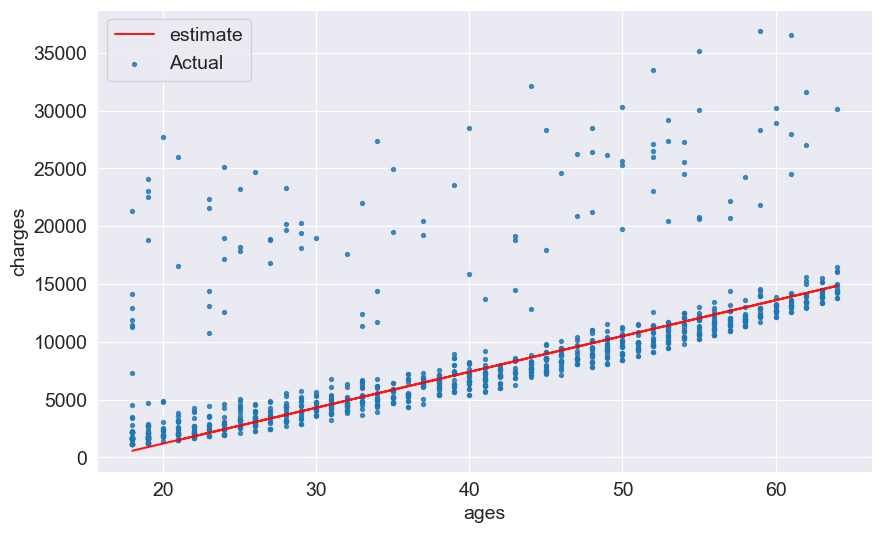

In [134]:
try_parameters(w,b)

In [128]:
targets = non_smokers['charges']
predicted = estimate_charges(non_smokers.age,w,b)

In [131]:
loss = rmse(targets,predicted)

In [133]:
print('RMSE loss: ',loss)

RMSE loss:  4858.115772171195


On an avarage each element in prediction differs from the actual targets by $8461

The result is called loss. it indicates how bad is our model is at predicting  the target variables. the lower the loss the better our model.

optimizer

next we need a strategy to modify weights   w and to reduce the loss and improve    the "fit" of the line to the data. 

.Ordinary Least Squares(better for smaller datasets)
.   stochastic gradient decent (better for larger datasets)

both of this have same ojective to minimize the loss

we dont need to look more on this. becuase we dont want to implement this. mostly we use libraries.

Linear Regression Using Scikit-learn

In [135]:
from sklearn.linear_model import LinearRegression

In [137]:
model = LinearRegression()

now we can use the fit method to the model to find the best fut line for the inputs and targets

In [139]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



now the the input x is must be 2d array so we'll need to pass the dataframe ,insted of a single coulumn

In [143]:
inputs = non_smokers[['age']]
targets =non_smokers.charges
print(f"inputs: ",{inputs.shape})
print(f"targets: ",{target.shape})

inputs:  {(1064, 1)}
targets:  {(1064,)}


Lets fit the model to the data

In [144]:
model.fit(inputs,targets)

LinearRegression()

now we can use predictions using the model. lets try predicting the charges for agees 23,34,54


In [145]:
model.predict([[23],
               [34],
               [54]])

c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  6995.0424797 , 12340.02073632])

Does this values seems resonable? lets compute for all the inputs

In [146]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [148]:
# actual charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Lets compute RMSE to evalute the model

In [147]:
rmse(targets,predictions)

np.float64(4662.505766636395)

seems like the prediction is off by $4000 on avarage,which is not too bad considering the fact that there are several outliers

The parameters are stored in coef_ and intercept_ properties

In [149]:
# w
model.coef_

array([267.24891283])

In [150]:
# b
model.intercept_

np.float64(-2091.4205565650864)

are these parameters close to our best guess? 
lets visualize th eline created by the above paraeters

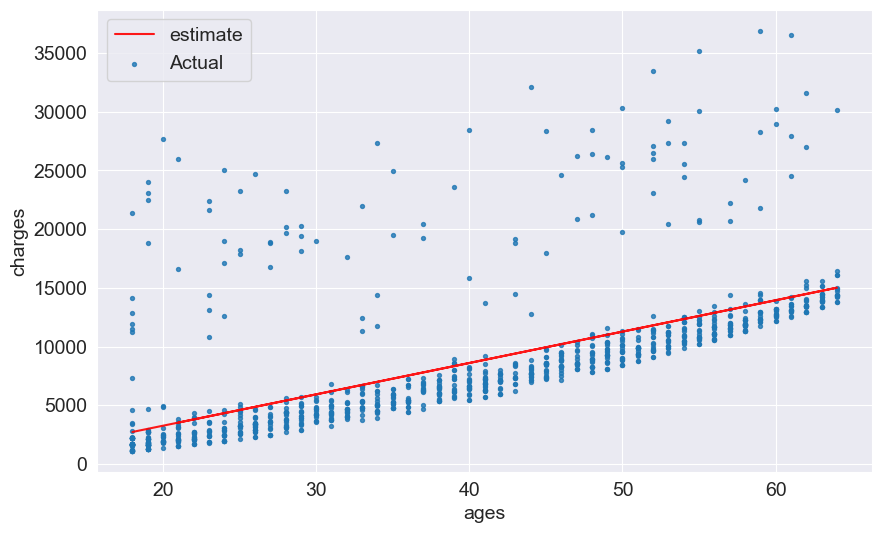

In [151]:
try_parameters(model.coef_,model.intercept_)

indeed quite close. nut little above the cluster of points. becuese its also trying to account the for the outliers